In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r'E:\LUMIA 525\DS\Notes\Other\DATASETS\creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.shape

(284807, 31)

In [4]:
df.isnull().sum().sort_values(ascending=False)

Class     0
V14       0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V15       0
Amount    0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Time      0
dtype: int64

In [5]:
X = df.drop("Class",axis=1)
Y = df["Class"]

In [6]:
X.shape,Y.shape

((284807, 30), (284807,))

# IS MY DATA SET IMBALANCED?

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
count = df["Class"].value_counts()
count

0    284315
1       492
Name: Class, dtype: int64

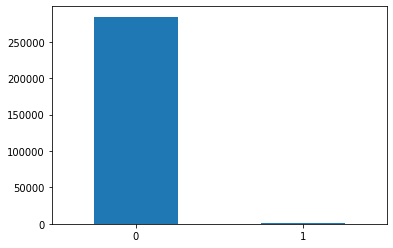

In [9]:
count.plot(kind = 'bar',rot=0)

In [10]:
Fraud = df[df["Class"]==1]
NonFraud = df[df["Class"]==0] 

In [11]:
Fraud.shape,NonFraud.shape

((492, 31), (284315, 31))

# Handling Imbalanced Dataset

## 1

In [12]:
from imblearn.combine import SMOTETomek
SMT = SMOTETomek(random_state=100)

In [13]:
X_res1, Y_res1=SMT.fit_sample(X,Y)
X_res1.shape,Y_res1.shape

((567468, 30), (567468,))

In [14]:
Y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [15]:
Y_res1.value_counts()

1    283734
0    283734
Name: Class, dtype: int64

## 2

In [16]:
from imblearn.over_sampling import RandomOverSampler
ROS =  RandomOverSampler()

In [17]:
X_res2, Y_res2 = ROS.fit_sample(X, Y)
X_res2.shape,Y_res2.shape

((568630, 30), (568630,))

In [18]:
Y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [19]:
Y_res2.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

## 3

In [20]:
from imblearn.under_sampling import NearMiss
NM = NearMiss()

In [21]:
X_res3, Y_res3 = NM.fit_sample(X, Y)
X_res3.shape,Y_res3.shape

((984, 30), (984,))

In [22]:
Y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [23]:
Y_res3.value_counts()

1    492
0    492
Name: Class, dtype: int64